## 2-Asset Combinations

Portfolio mapping on the risk/return space or mean variance framework. 
The return on a portfolio is nothing more than the weighted average of all the components of your portfolio. 
The risk, however, is a bit more complicated than that. Risk depends on the correlation between the assets in your portfolio:

* In case of perfectly correlated two assets A & B, the portfolio volatility is the average of the volatilities of A and B.
* If they are not correlated, the combination will be less volatile. It is less than the halfway in between.
* This is the basic of portfolio construction

> If X and Y are perfectly correlated, the minimum value portfolio is obtained by putting 100% of your capital in the portfolio with the lower of the two volatilities

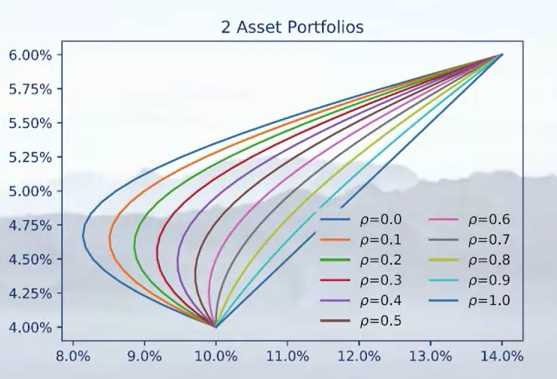

In the image above we see two asset portfolio in function of their correlation. If the correlation between those two is one, then in fact you do just get a straight line between the two. But, if the correlation starts to drop off,  you see that you get a little bit of a gradual curve.


And this is exactly what the science of portfolio construction is for the most part. It is exploiting this one feature that says that, hey, if you put two things together that are decorrelated, you will get some sort of magical bang for the buck. This is what someone people call *the only free lunch in all of finance.*

> As correlations between A and B increase, the volatility of the combination of A and B becomes closer to the weighted average volatility of A and B.   
> As correlations increase, the volatility of the minimum possible volatility portfolio increases 

If you take two decorrelated assets and you put them together, you can construct a portfolio that has a lower volatility. In other words, this the power of diversification.

## Lab Session - Efficient Frontier - Part 1

In [1]:
import pandas as pd

In [4]:
ind = pd.read_csv("../data/ind30_m_vw_rets.csv", header=0, index_col=0, parse_dates=True)/100

In [5]:
ind.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
192607,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
192608,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
192609,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,...,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
192610,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
192611,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,...,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400


In [6]:
ind.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1110 entries, 192607 to 201812
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Food    1110 non-null   float64
 1   Beer    1110 non-null   float64
 2   Smoke   1110 non-null   float64
 3   Games   1110 non-null   float64
 4   Books   1110 non-null   float64
 5   Hshld   1110 non-null   float64
 6   Clths   1110 non-null   float64
 7   Hlth    1110 non-null   float64
 8   Chems   1110 non-null   float64
 9   Txtls   1110 non-null   float64
 10  Cnstr   1110 non-null   float64
 11  Steel   1110 non-null   float64
 12  FabPr   1110 non-null   float64
 13  ElcEq   1110 non-null   float64
 14  Autos   1110 non-null   float64
 15  Carry   1110 non-null   float64
 16  Mines   1110 non-null   float64
 17  Coal    1110 non-null   float64
 18  Oil     1110 non-null   float64
 19  Util    1110 non-null   float64
 20  Telcm   1110 non-null   float64
 21  Servs   1110 non-null   float6

In [7]:
# The index should be dates and not int64
ind.index

Int64Index([192607, 192608, 192609, 192610, 192611, 192612, 192701, 192702,
            192703, 192704,
            ...
            201803, 201804, 201805, 201806, 201807, 201808, 201809, 201810,
            201811, 201812],
           dtype='int64', length=1110)

In [8]:
ind.index = pd.to_datetime(ind.index, format="%Y%m").to_period('M')

In [9]:
ind.index

PeriodIndex(['1926-07', '1926-08', '1926-09', '1926-10', '1926-11', '1926-12',
             '1927-01', '1927-02', '1927-03', '1927-04',
             ...
             '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08',
             '2018-09', '2018-10', '2018-11', '2018-12'],
            dtype='period[M]', length=1110, freq='M')

In [13]:
ind.sample(3)

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1987-08,0.0319,0.0208,0.1863,0.0573,-0.0038,0.0549,0.0101,0.0220,0.0239,-0.0199,...,0.0510,0.0644,0.0712,0.0653,-0.0002,0.0251,0.0338,0.0204,0.0583,0.0270
1971-01,0.0273,0.0451,0.0575,0.1156,0.0559,0.0515,0.1263,0.0492,0.0700,0.0630,...,0.0975,0.0861,0.0533,0.0543,0.1583,0.1394,0.0786,0.0705,0.0525,0.1419
1963-11,-0.0044,-0.0072,-0.0563,-0.0196,-0.0018,-0.0018,-0.0144,-0.0165,0.0222,0.0199,...,0.0416,-0.0378,-0.0027,-0.0093,0.0378,-0.0403,-0.0108,-0.0361,-0.0229,0.0167


In [14]:
ind.columns = ind.columns.str.strip()

In [20]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
import edhec_risk_kit as erk

In [22]:
ind = erk.get_ind_returns()
ind.sample(3)

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1969-09,0.0099,-0.0093,0.0414,0.0147,-0.0018,-0.0054,-0.0270,0.0217,-0.0545,-0.0305,...,-0.0400,0.0200,0.0035,0.0010,-0.0162,0.0034,-0.0076,-0.0102,-0.0074,-0.0092
1985-12,0.0268,0.1208,0.0983,0.0474,0.0674,0.0600,0.0215,0.0348,0.0661,0.0761,...,0.0620,0.0584,0.0850,0.0539,0.0152,0.0619,0.0416,0.0405,0.0498,0.0617
1941-02,-0.0260,-0.0374,-0.0232,0.0056,-0.0098,-0.0464,-0.0295,-0.0469,-0.0240,-0.0096,...,-0.0223,-0.0608,-0.0055,-0.0100,0.0013,-0.0448,-0.0250,-0.0221,-0.0062,-0.0256


In [24]:
ind.shape

(1110, 30)

<AxesSubplot:>

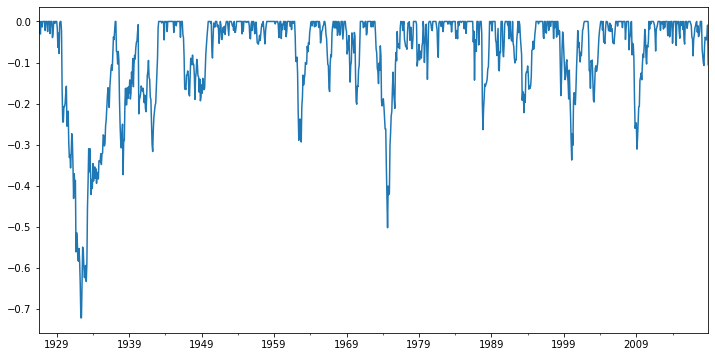

In [25]:
erk.drawdown(ind['Food'])["Drawdown"].plot.line(figsize=(12, 6));

In [26]:
cols_of_interest = ["Food", "Smoke", "Coal", "Beer", "Fin"]
erk.var_gaussian(ind[cols_of_interest], modified=True)

Food     0.061207
Smoke    0.080292
Coal     0.047359
Beer     0.033881
Fin      0.075199
dtype: float64

In [27]:
erk.var_gaussian(ind, modified=True).sort_values(ascending=False)

Mines    0.102782
Games    0.100701
BusEq    0.099377
Meals    0.098403
Carry    0.094527
Cnstr    0.089668
Books    0.088675
FabPr    0.088491
ElcEq    0.087624
Other    0.087270
Oil      0.081244
Whlsl    0.080604
Rtail    0.080437
Smoke    0.080292
Clths    0.079707
Txtls    0.079519
Chems    0.079262
Fin      0.075199
Steel    0.074436
Paper    0.073181
Hlth     0.071884
Util     0.071585
Autos    0.069545
Servs    0.066112
Trans    0.065468
Hshld    0.064886
Telcm    0.064719
Food     0.061207
Coal     0.047359
Beer     0.033881
dtype: float64

<AxesSubplot:>

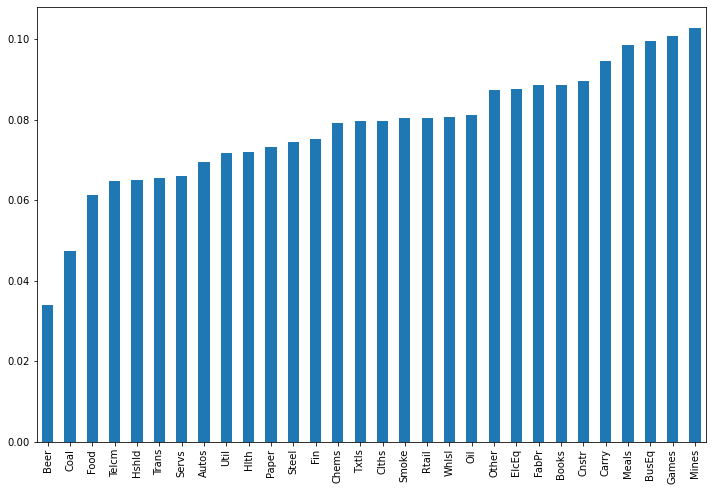

In [30]:
erk.var_gaussian(ind, modified=True).sort_values().plot.bar(figsize=(12, 8))

<AxesSubplot:title={'center':'Industry Sharpe Ratios 1962-2018'}>

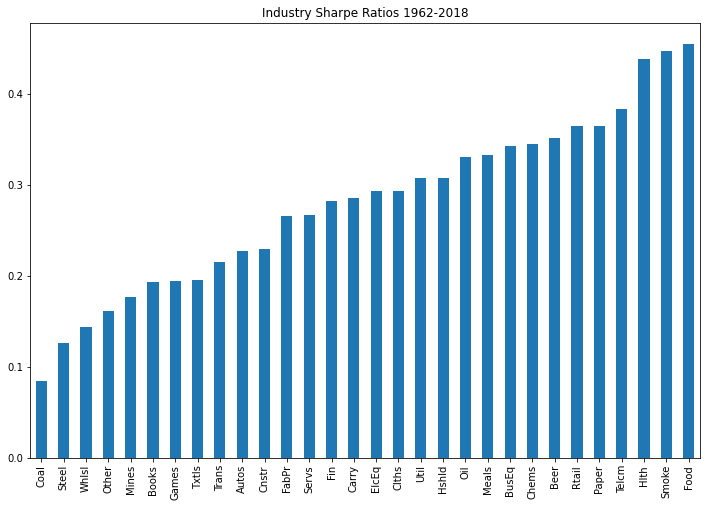

In [31]:
erk.sharpe_ratio(ind, 0.03, 12).sort_values().plot.bar(title="Industry Sharpe Ratios 1962-2018", figsize=(12, 8));

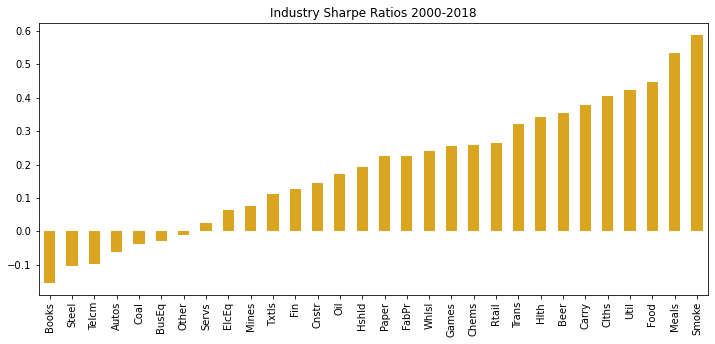

In [32]:
erk.sharpe_ratio(ind.loc["2000":], 0.03, 12).sort_values().plot.bar(title="Industry Sharpe Ratios 2000-2018", figsize=(12, 5), color="goldenrod");

In [33]:
er = erk.annualize_rets(ind.loc["1995":"2000"], 12)

<AxesSubplot:>

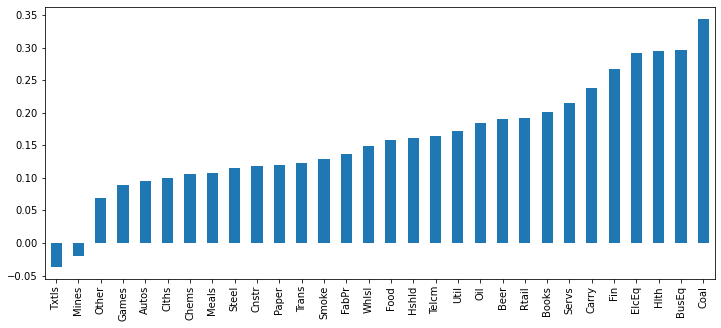

In [36]:
er.sort_values().plot.bar(figsize=(12, 5))

In [37]:
cov = ind.loc["1995":"2000"].cov()

In [38]:
cov.shape

(30, 30)

In [39]:
cov.iloc[:5]

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
Food,0.002287,0.002077,0.001757,0.000701,0.000886,0.001208,0.001474,0.001105,0.001253,0.001021,...,0.000610,0.000211,-0.000280,0.001205,0.001312,0.000633,0.001165,0.001085,0.001839,0.000898
Beer,0.002077,0.004599,0.001143,0.001147,0.000765,0.002447,0.001415,0.001689,0.001292,0.001721,...,0.000978,0.000400,0.000028,0.001455,0.001974,0.000609,0.001442,0.001634,0.002236,0.001196
Smoke,0.001757,0.001143,0.007130,0.000296,-0.000099,0.000981,0.000761,0.000877,0.000687,0.000555,...,0.000057,-0.000266,-0.000300,0.001061,0.000241,0.001363,0.000069,0.000590,0.001117,0.001418
Games,0.000701,0.001147,0.000296,0.003271,0.001485,0.001018,0.001814,0.001219,0.001547,0.001291,...,0.001615,0.002399,0.002935,0.001615,0.001438,0.001681,0.001649,0.001383,0.002080,0.002088
Books,0.000886,0.000765,-0.000099,0.001485,0.002302,0.000876,0.002037,0.000657,0.001559,0.001362,...,0.001627,0.001996,0.001624,0.001481,0.001576,0.001205,0.001995,0.001026,0.001979,0.001283
